In [1]:
import os
if not os.getcwd().endswith('CIoTS'):
    os.chdir('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CIoTS import *

/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [37]:
from itertools import product
dimensions = [3, 5, 10]
incoming_edges = [2, 3, 4]
taus = [5, 10, 15, 20]
autocorrs = [False]
data_length = [10000]
runs = range(10)

setups = list(product(dimensions, incoming_edges, taus, autocorrs, data_length, runs))

In [71]:
setups[45]

(3, 3, 5, False, 10000, 5)

In [72]:
dim, in_edges, tau, autocorr, _, run = setups[45]

In [73]:
import pickle

data_path = 'notebooks/ICML/icml_data_no_autocorr/'
results_path = 'notebooks/ICML/icml_results/'

generator = pickle.load(open(data_path + f't={tau}_d={dim}_in={in_edges}_autocorr={autocorr}_{run}.pickle', 'rb'))

In [80]:
df_dict = {'dimension': dim, 'max time lag': tau, 'incoming edges': in_edges, 'run': run, 'autocorr': autocorr}
name = 'PC1 incremental'

_, graphs, _, stopper, _ = pc_incremental_extensive(partial_corr_test, generator.ts, max_p=20, 
                                                    use_stopper=False, alpha=0.01, verbose=True)
k = 2
for offset in range(-k, k+1):
    f1_score = evaluate_edges(generator.graph, graphs[tau+offset])['f1-score']
    df_dict[name + '_f1' + (f'+{offset}' if offset>=0 else str(offset))] = f1_score
df_dict

{'dimension': 3,
 'max time lag': 5,
 'incoming edges': 3,
 'run': 5,
 'autocorr': False,
 'PC1 incremental_f1-2': 0.28571428571428575,
 'PC1 incremental_f1-1': 0.36363636363636365,
 'PC1 incremental_f1+0': 0.6153846153846153,
 'PC1 incremental_f1+1': 0.64,
 'PC1 incremental_f1+2': 0.6153846153846153}

In [85]:
stopper.best_tau

7

In [82]:
stopper.scores()

{1: 5.514295654682758,
 2: 2.1107567650933854,
 3: -0.35549032426462923,
 4: -3.2073905480783225,
 5: -12.35063026829428,
 6: -13.120449265262346,
 7: -13.543344285248294,
 8: -13.12660375421079,
 9: -13.1236659366203,
 10: -12.828018269307487,
 11: -13.061388171422664,
 12: -12.946754653888146,
 13: -13.13121199218694,
 14: -13.13053900576757,
 15: -13.159144594547948,
 16: -13.158802058366772,
 17: -13.156265276438539,
 18: -13.15028426508381,
 19: -13.146048810799412,
 20: -13.158677547330631}

1


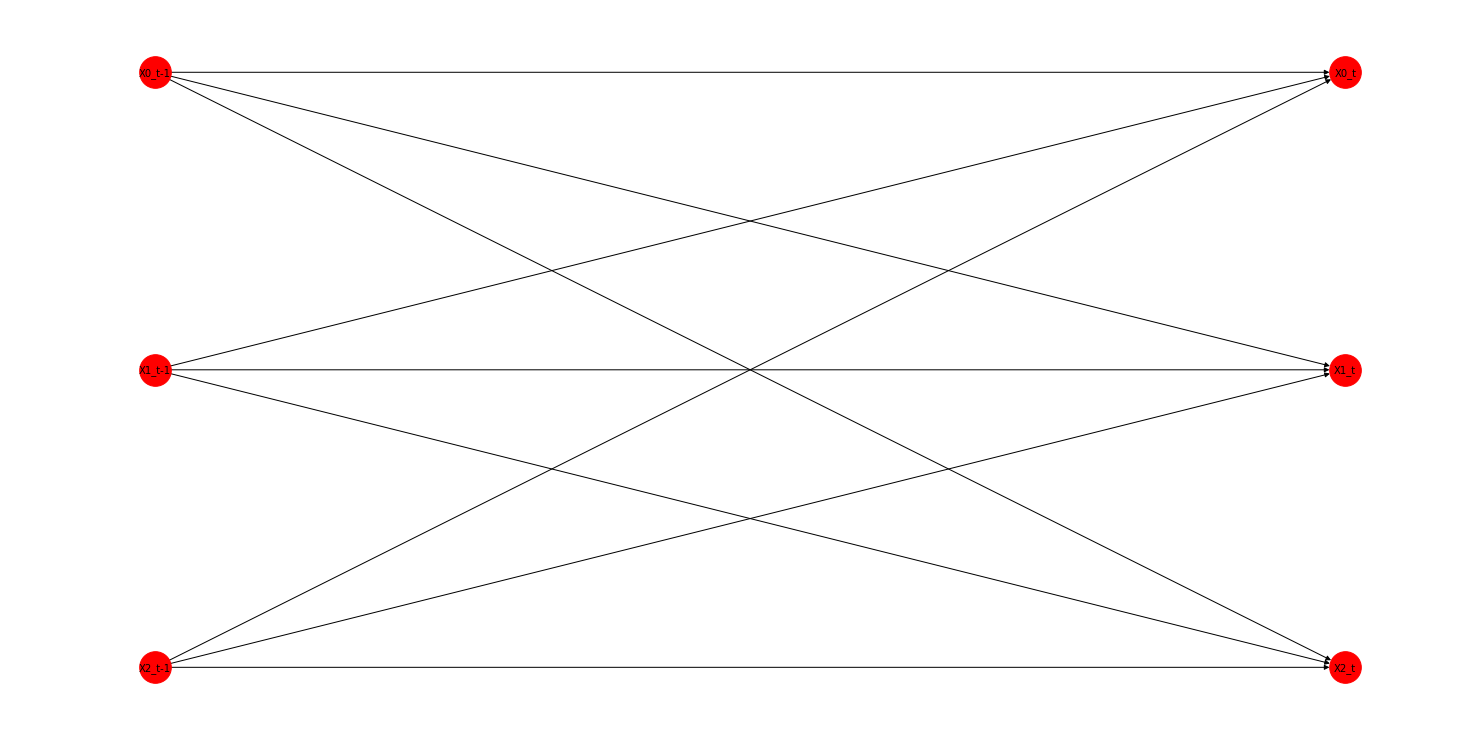

2


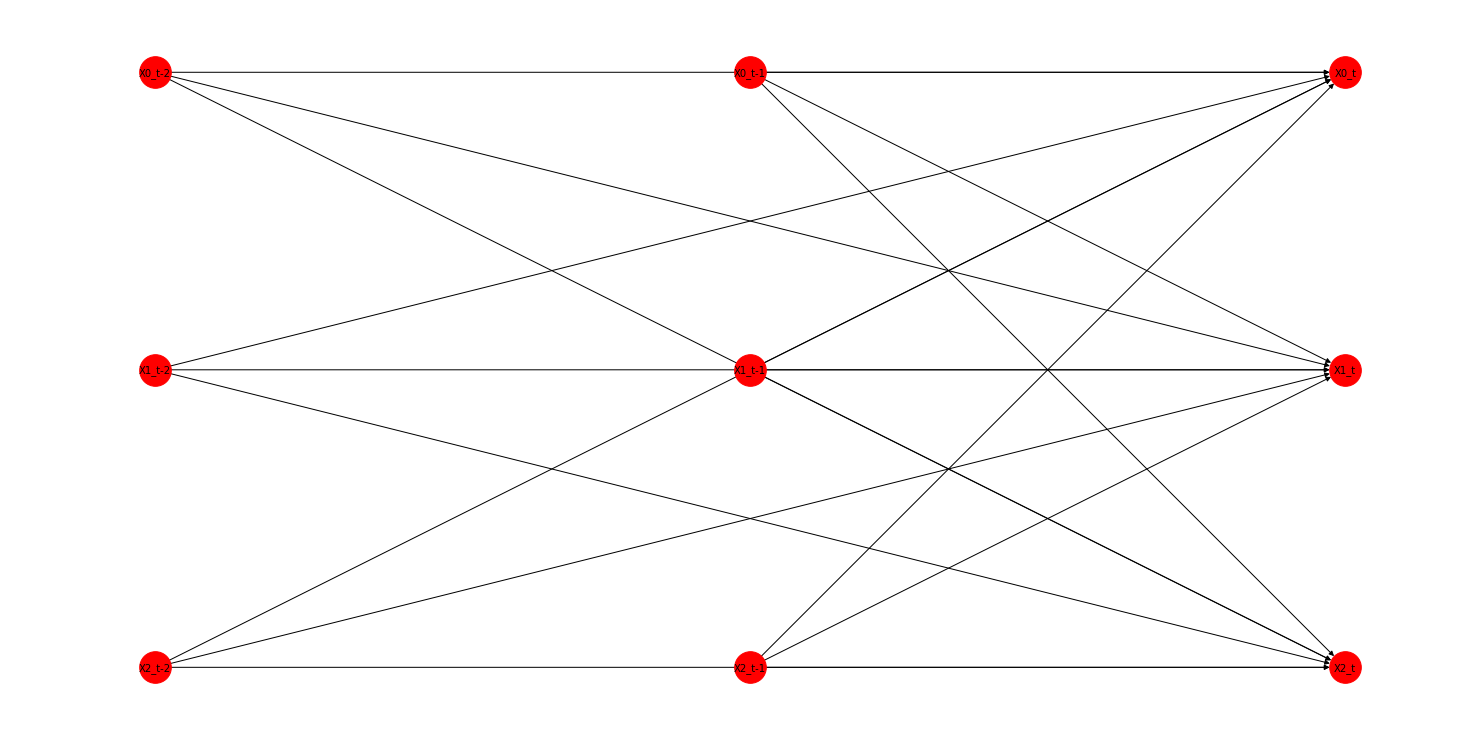

3


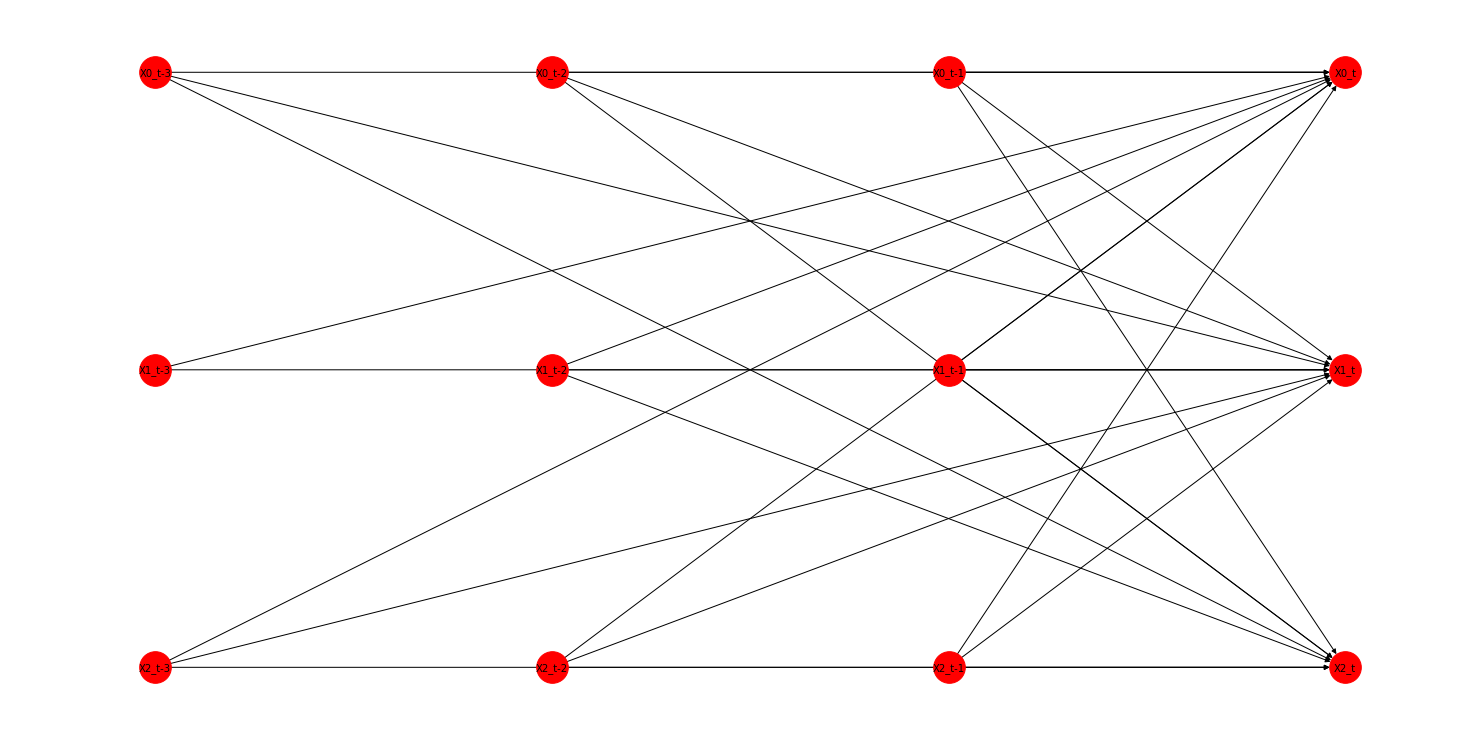

4


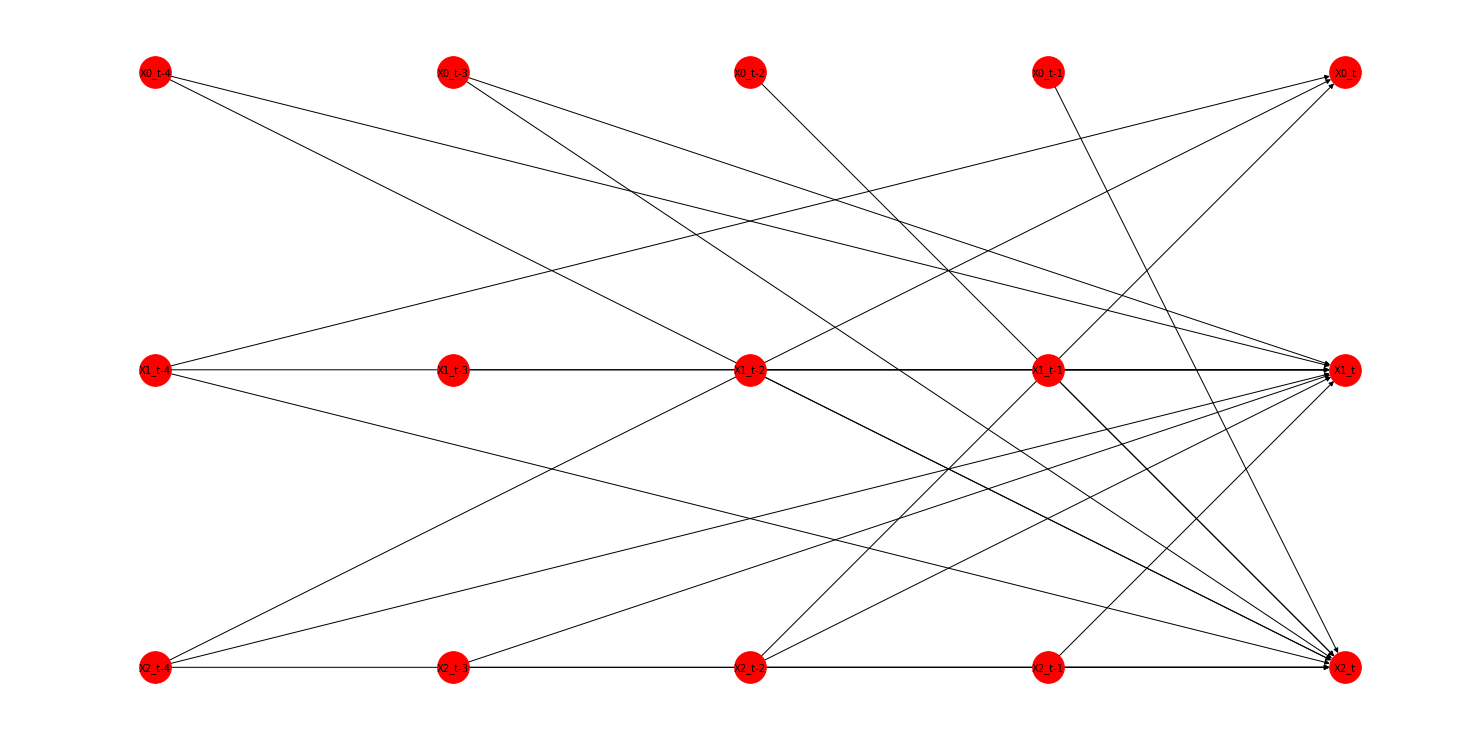

5


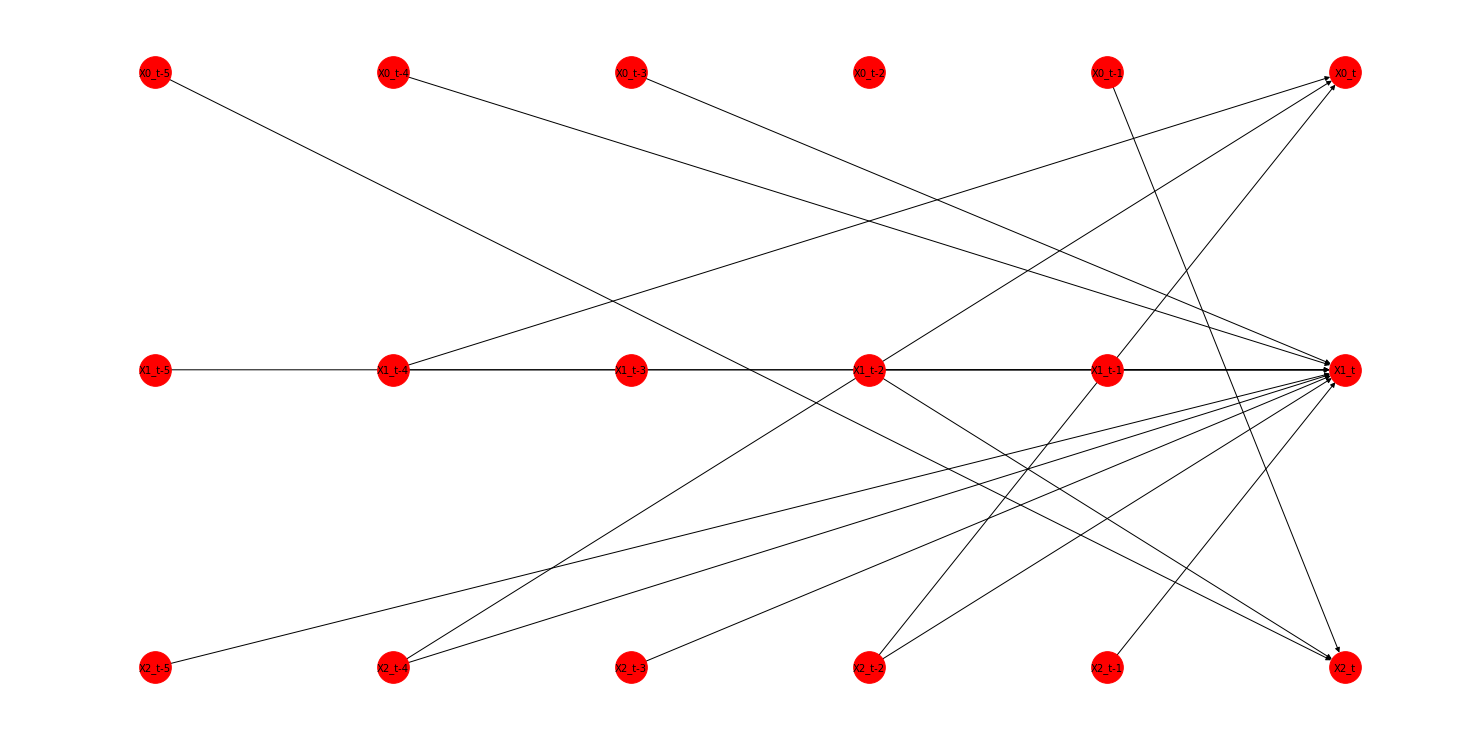

6


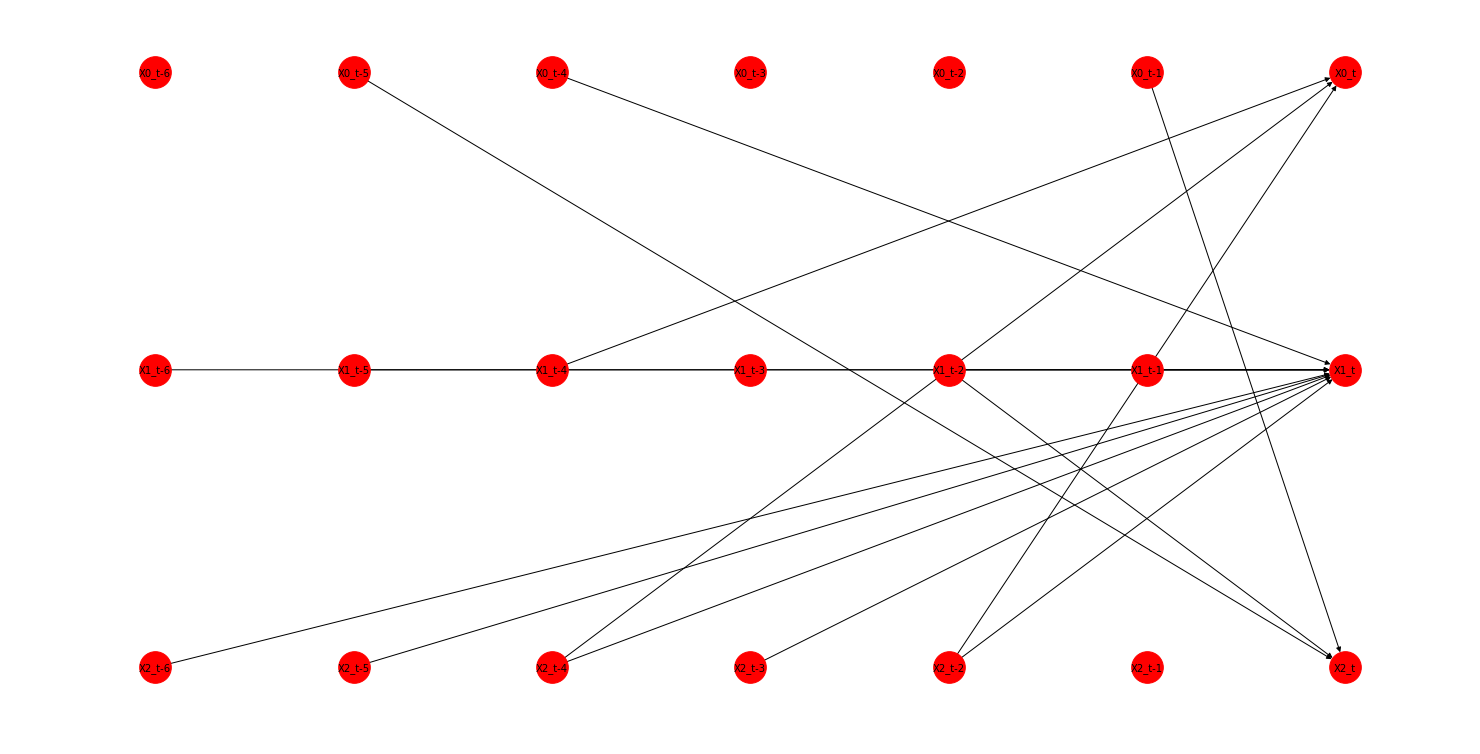

7


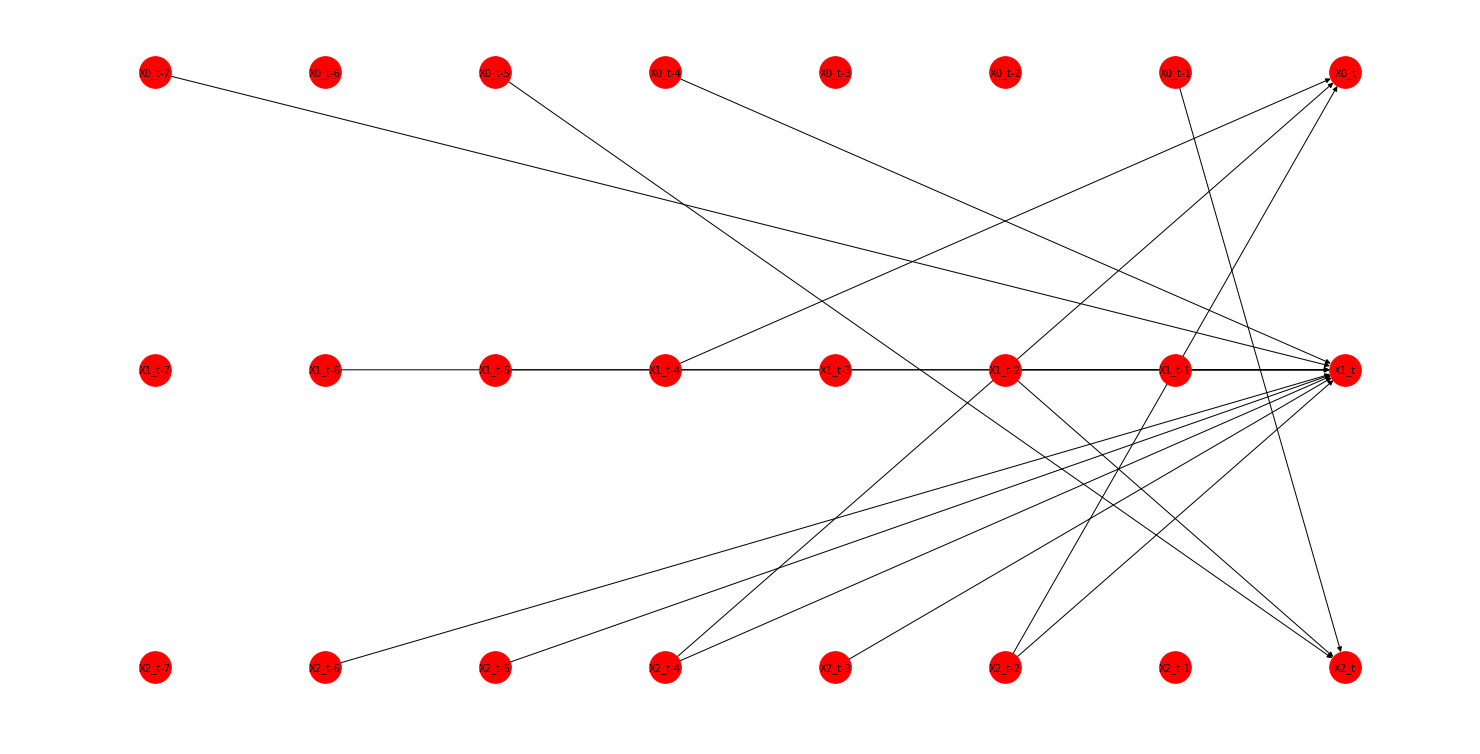

8


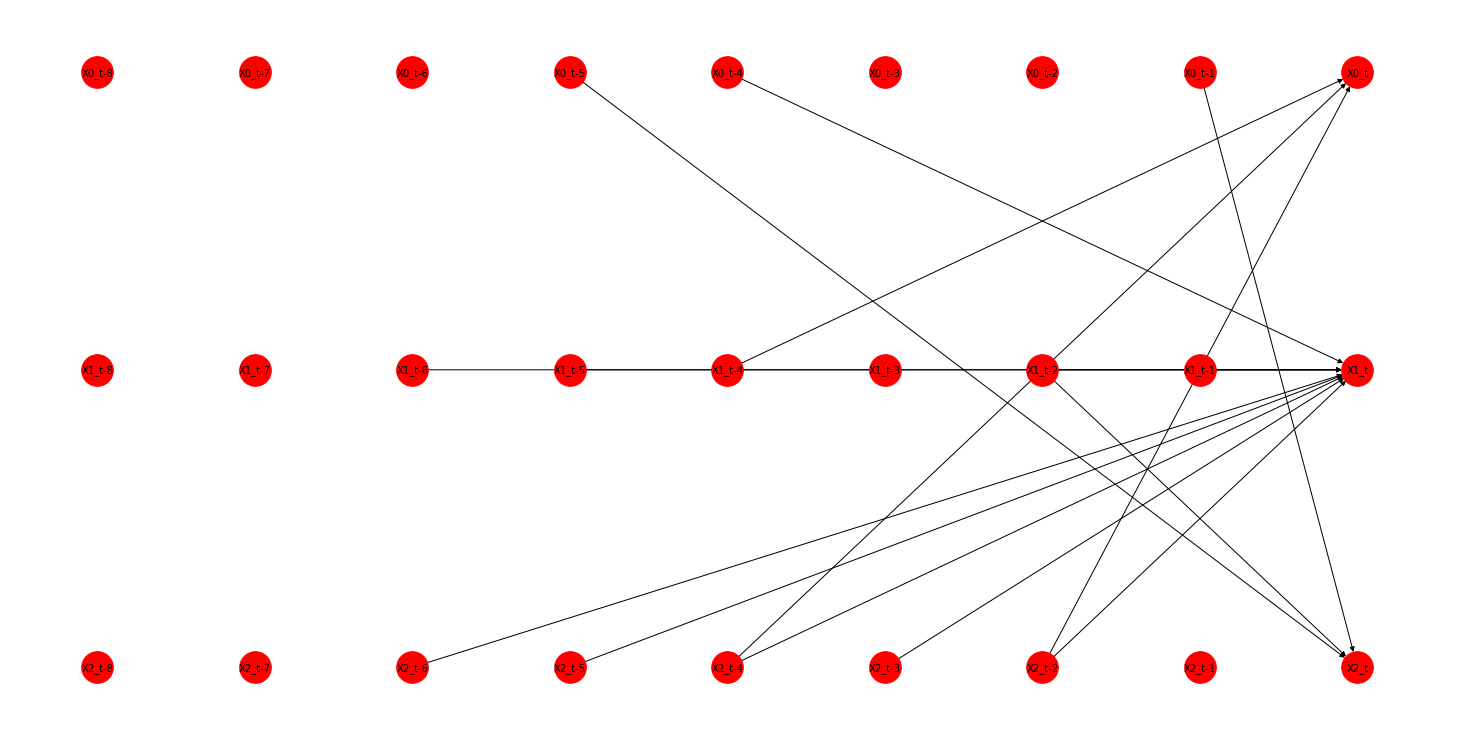

9


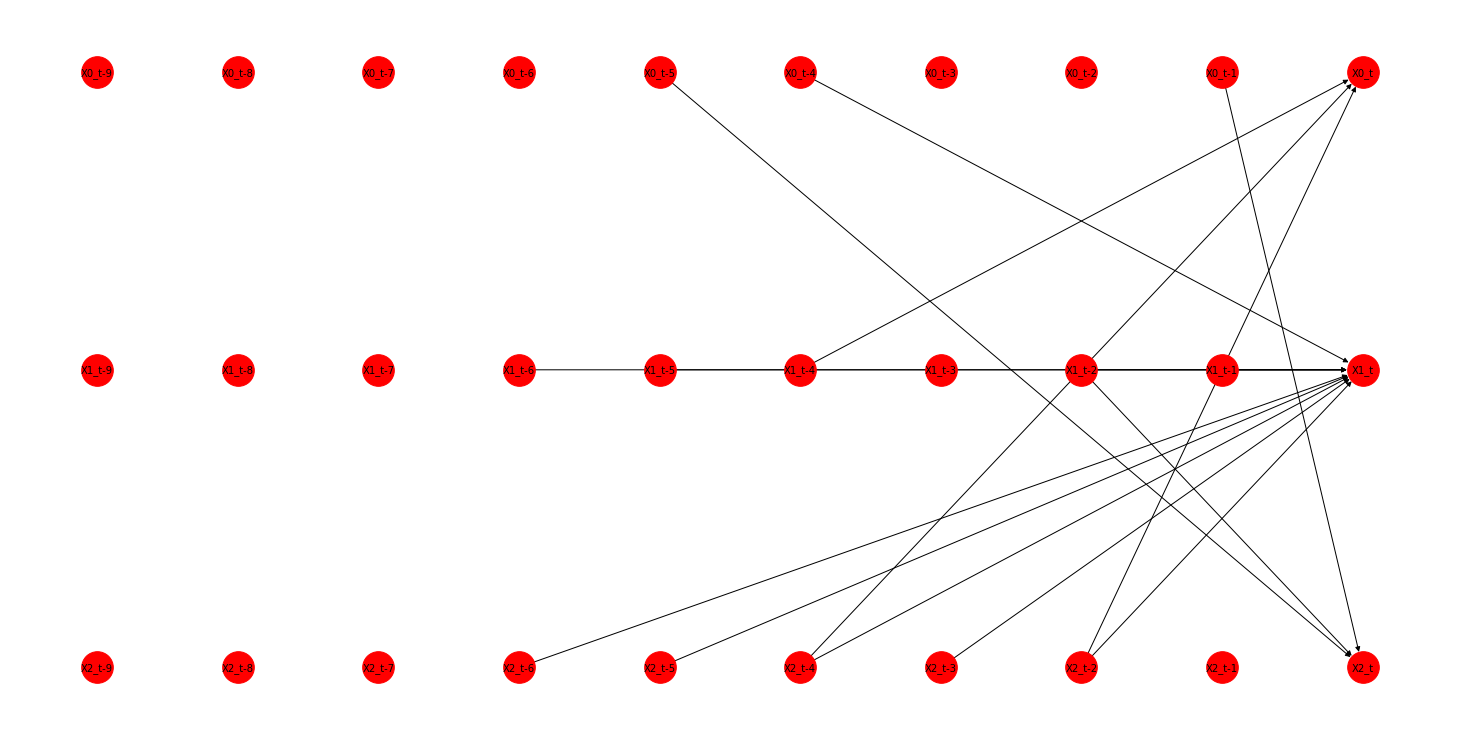

10


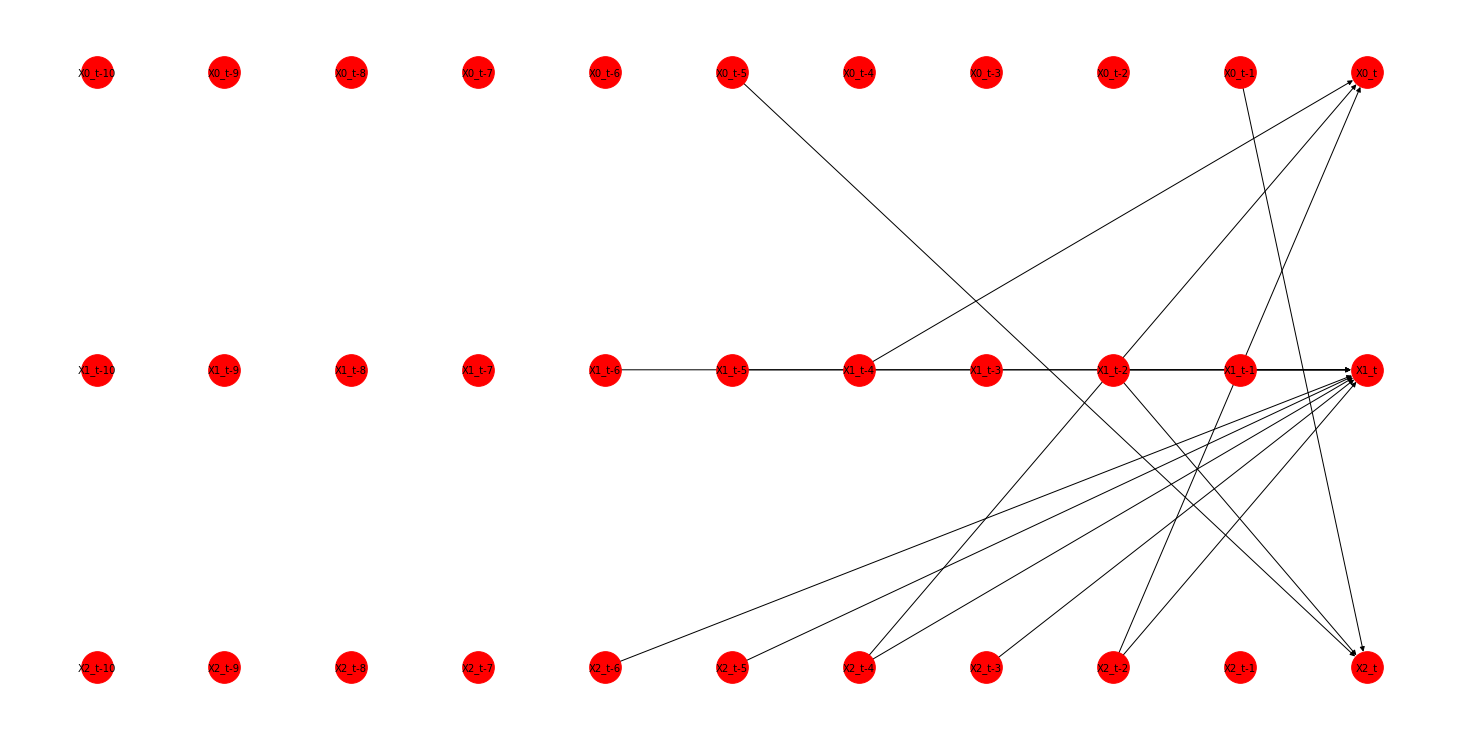

11


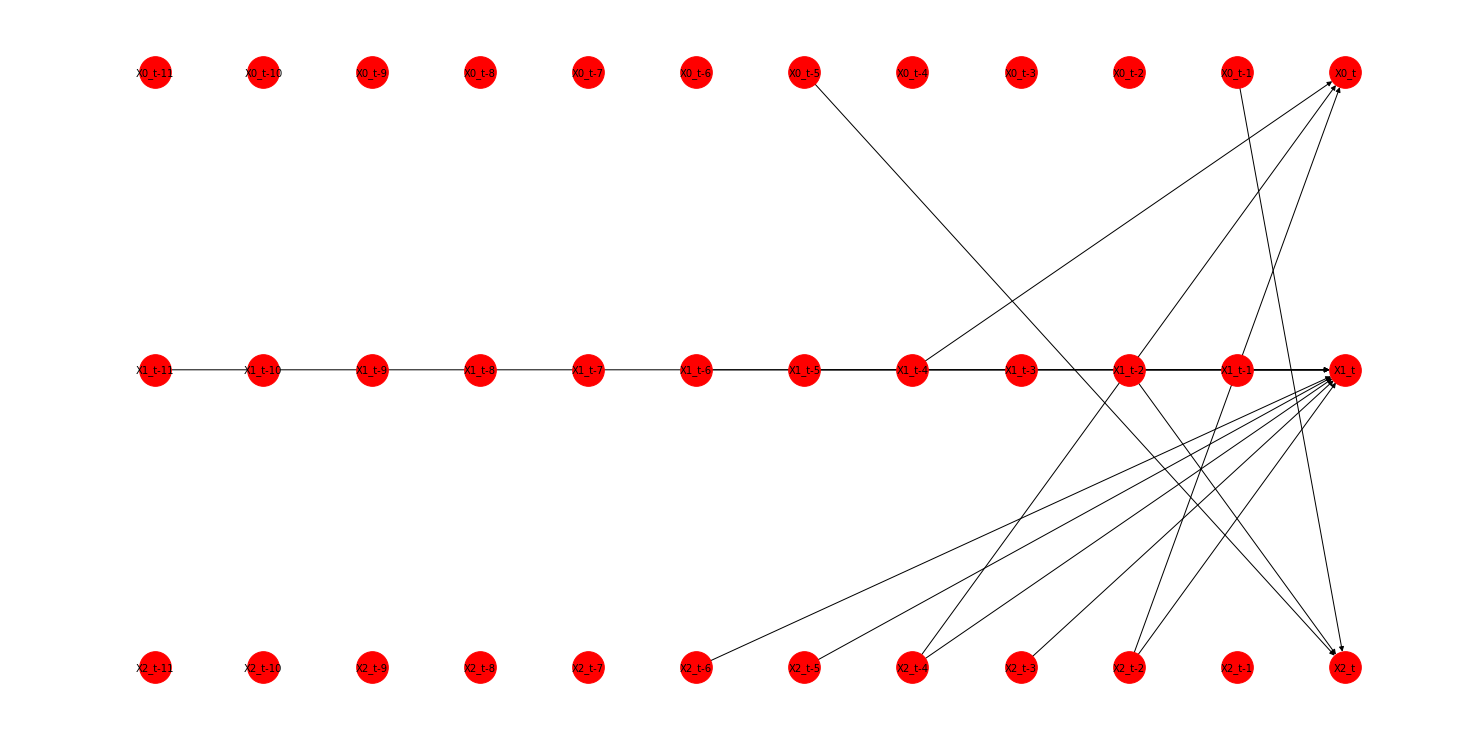

12


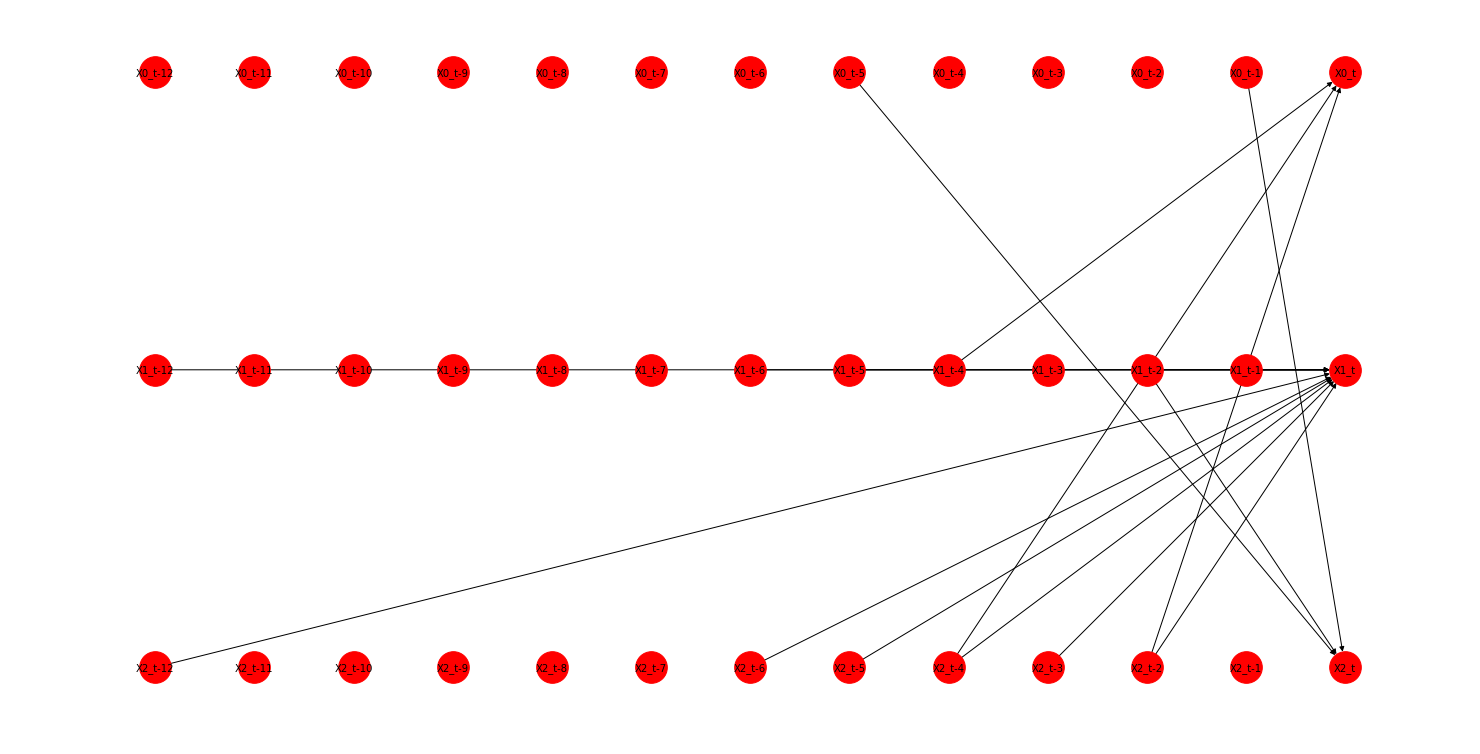

13


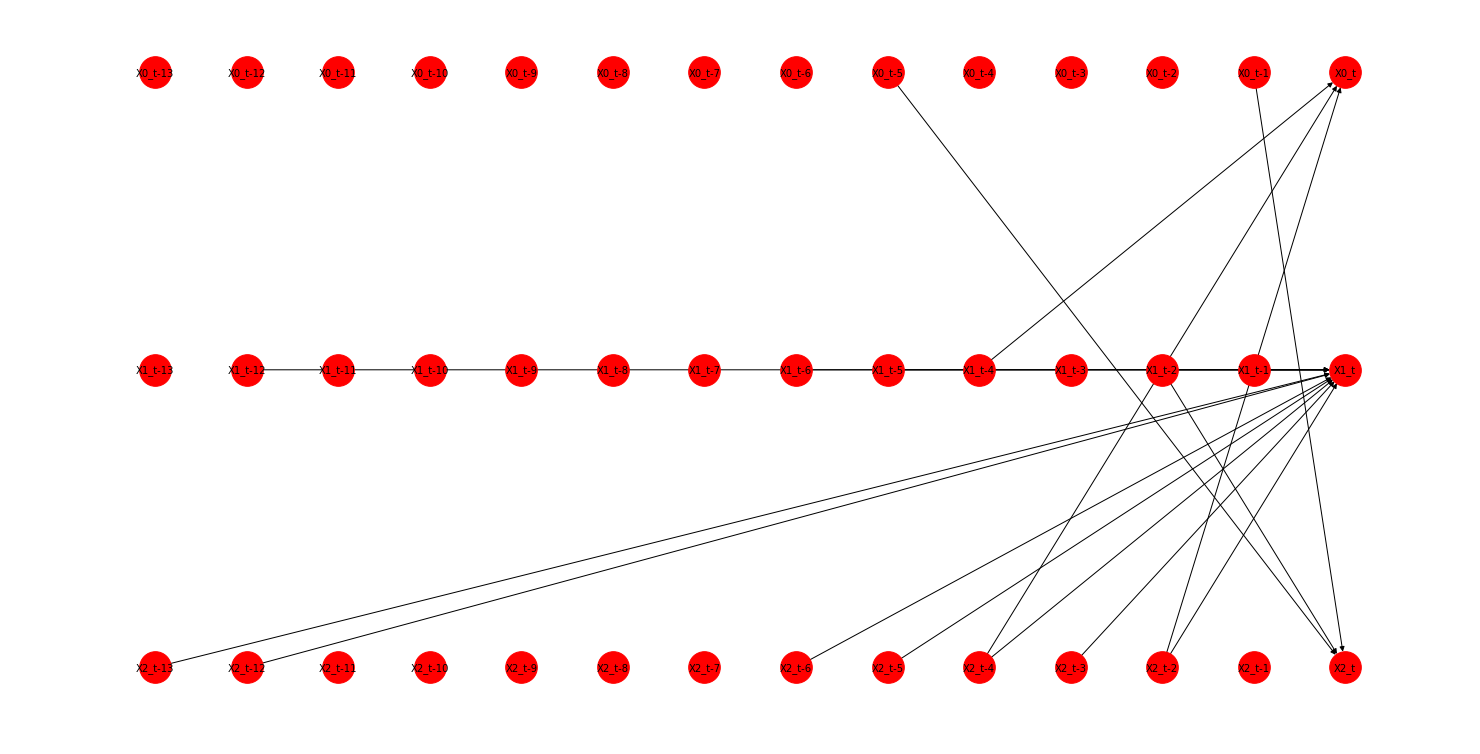

14


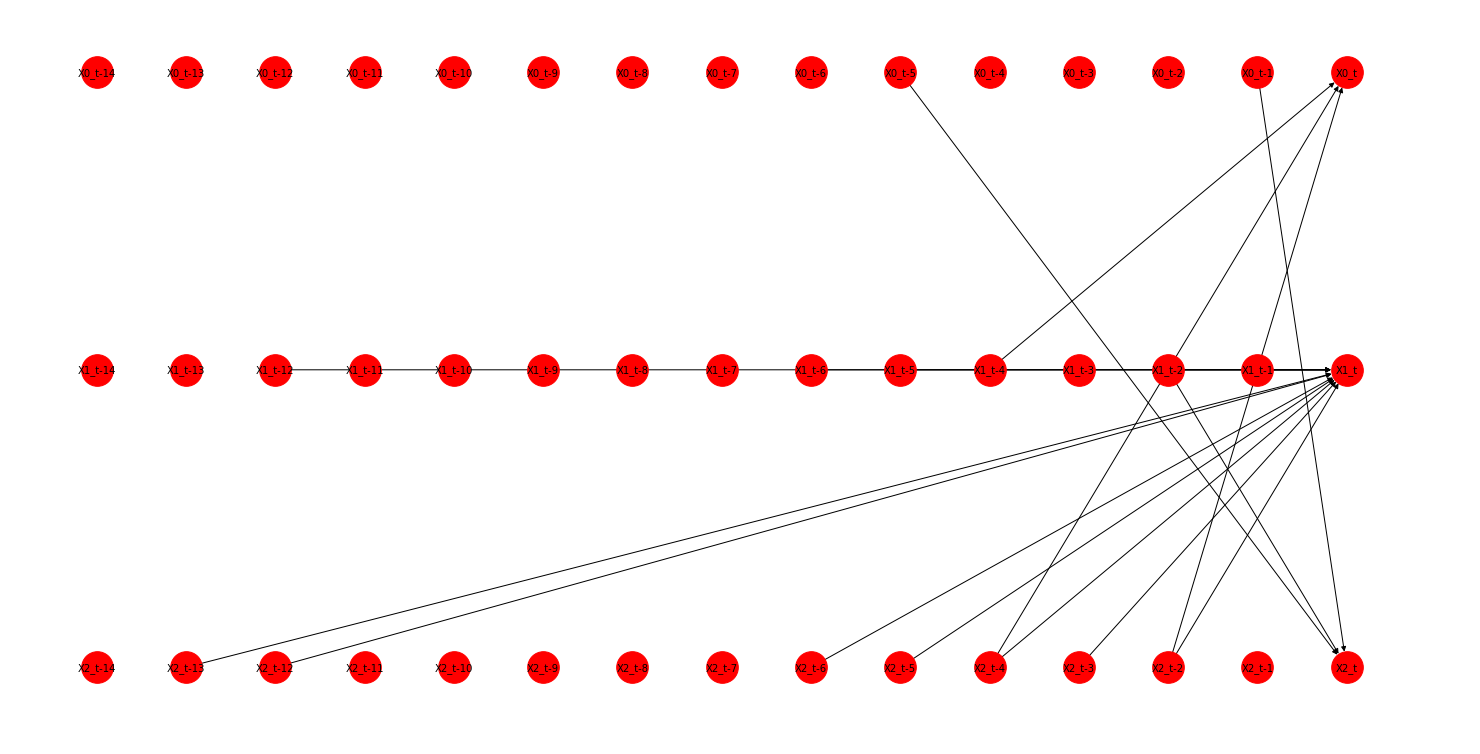

15


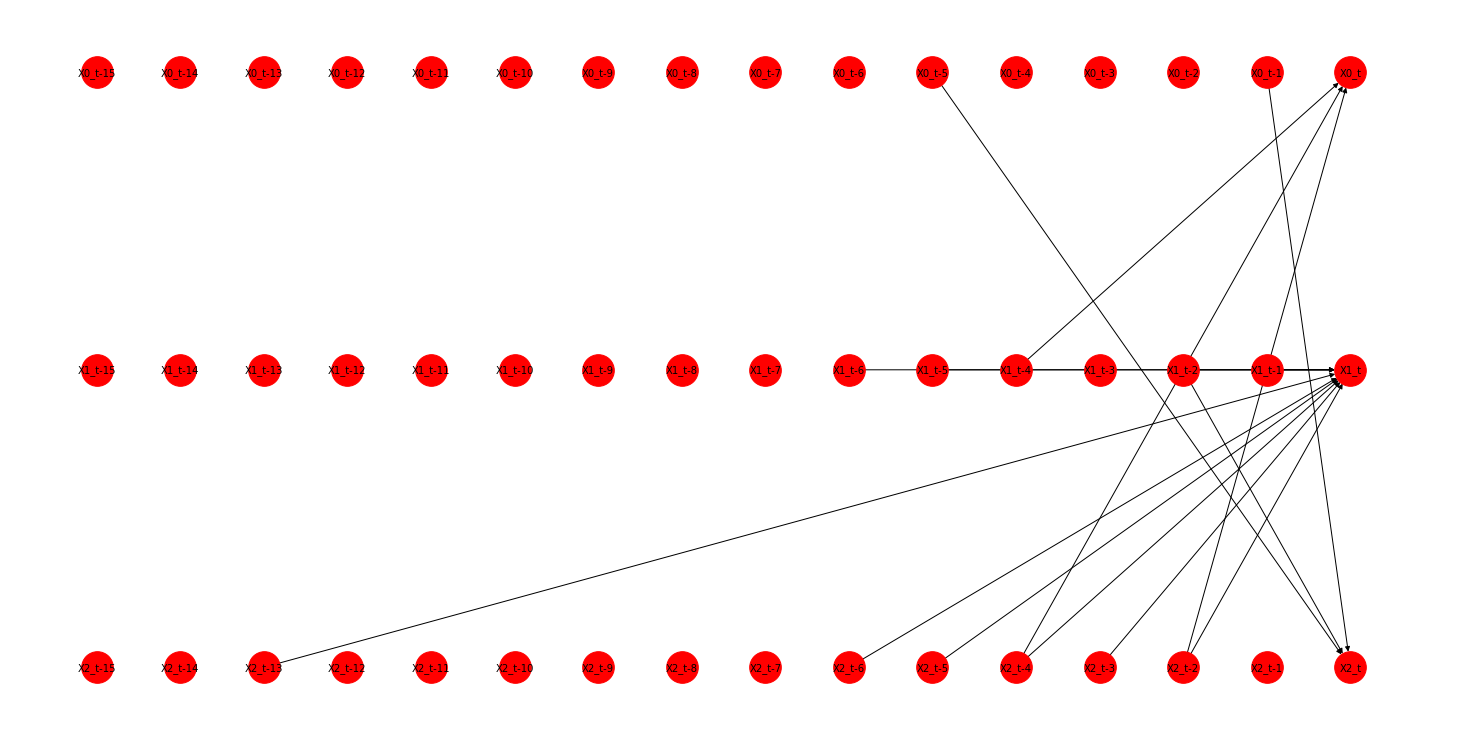

16


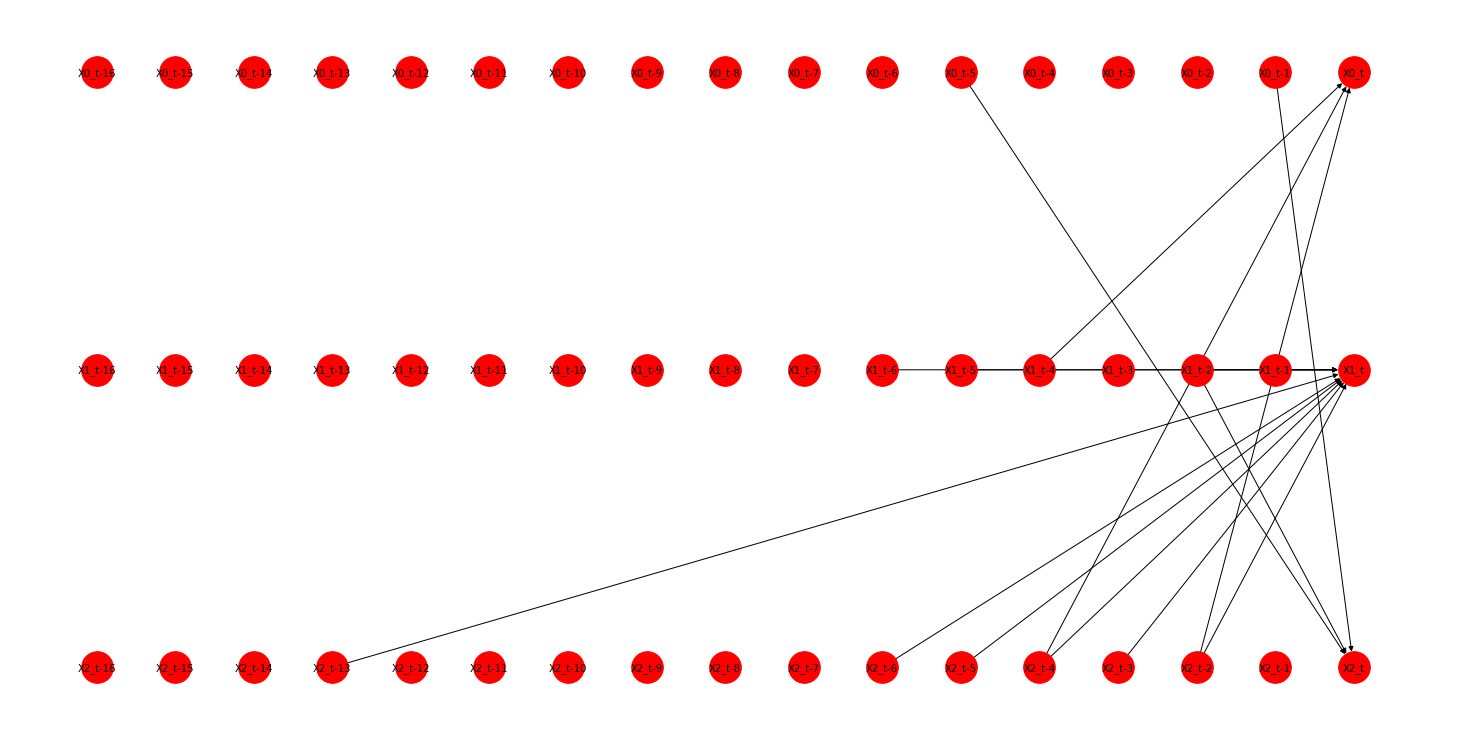

17


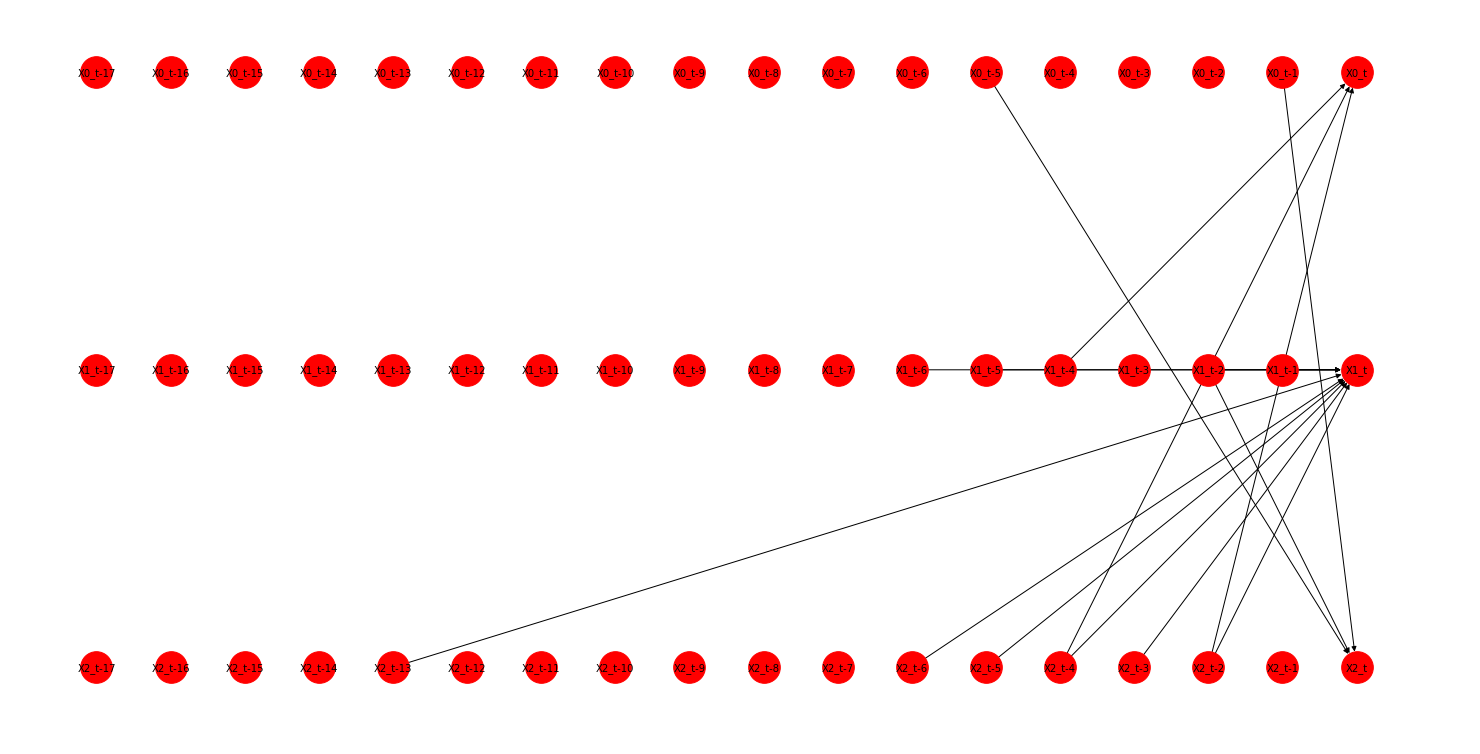

18


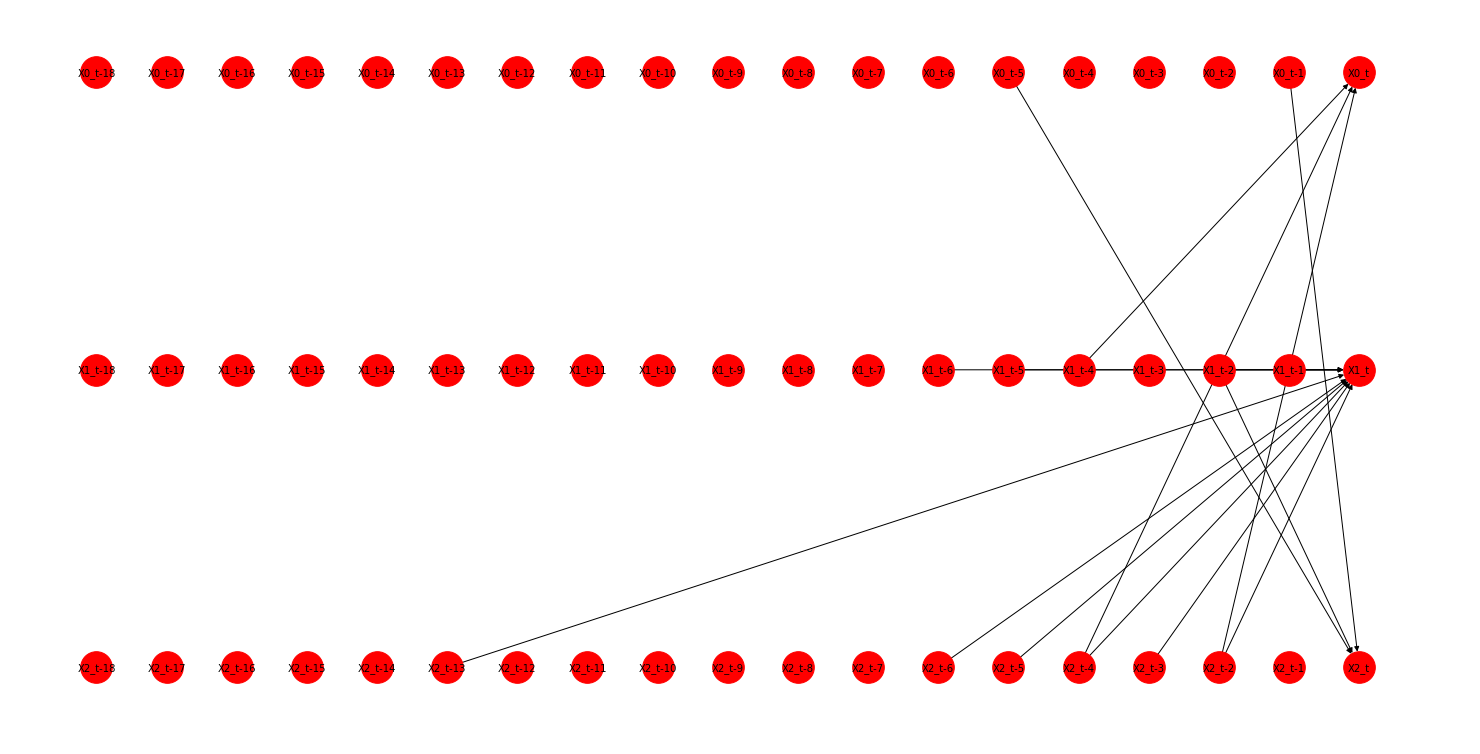

19


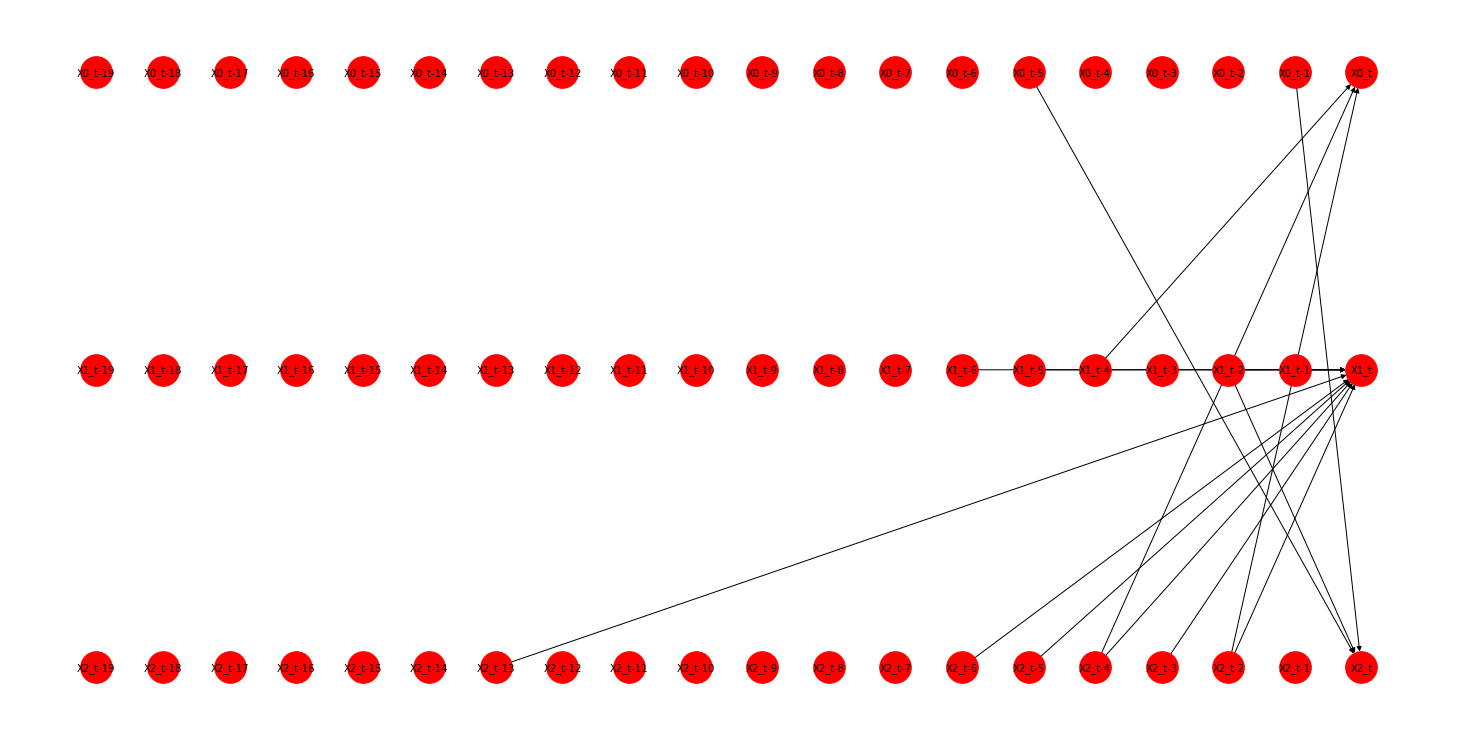

20


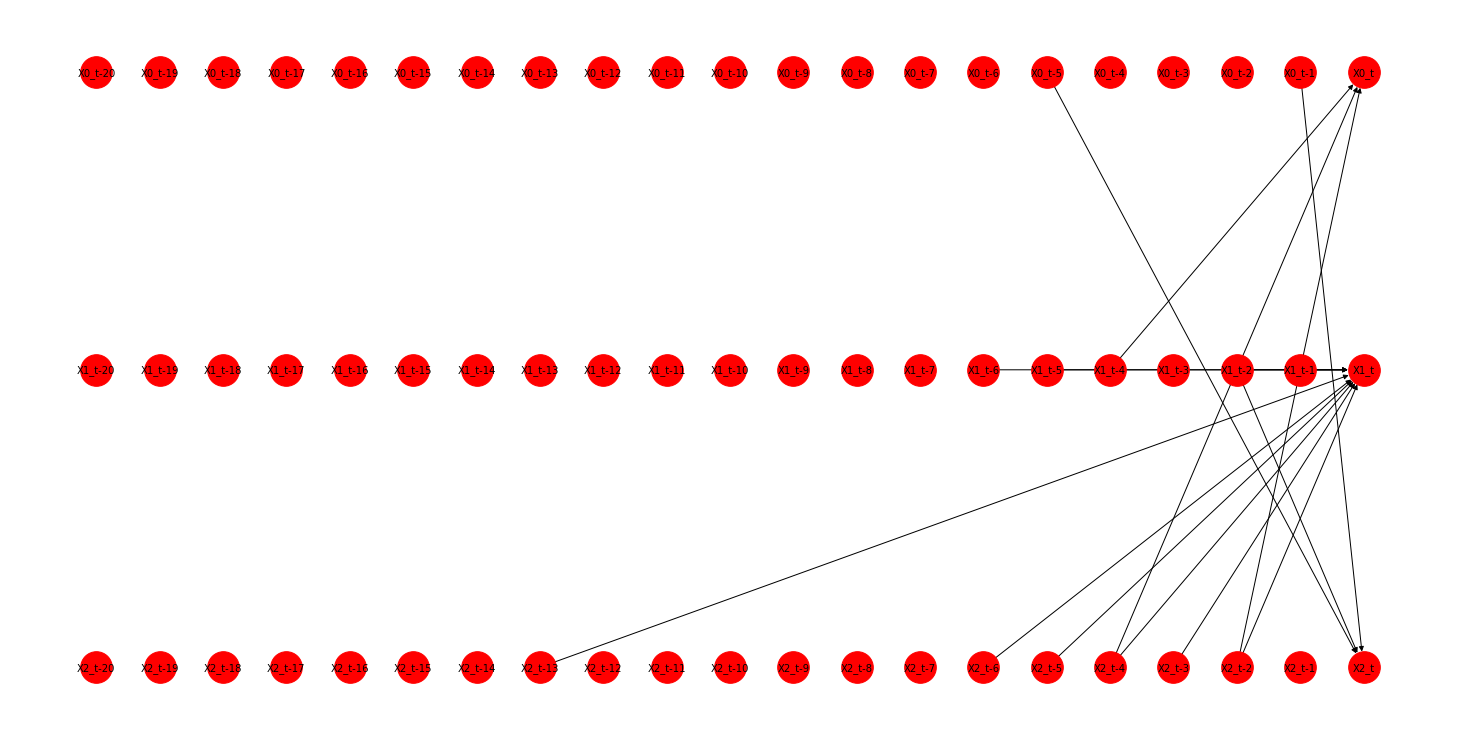

In [83]:
for idx, graph in graphs.items():
    print(idx)
    plt.figure(figsize=(20,10))
    draw_graph(graph, dim, tau)

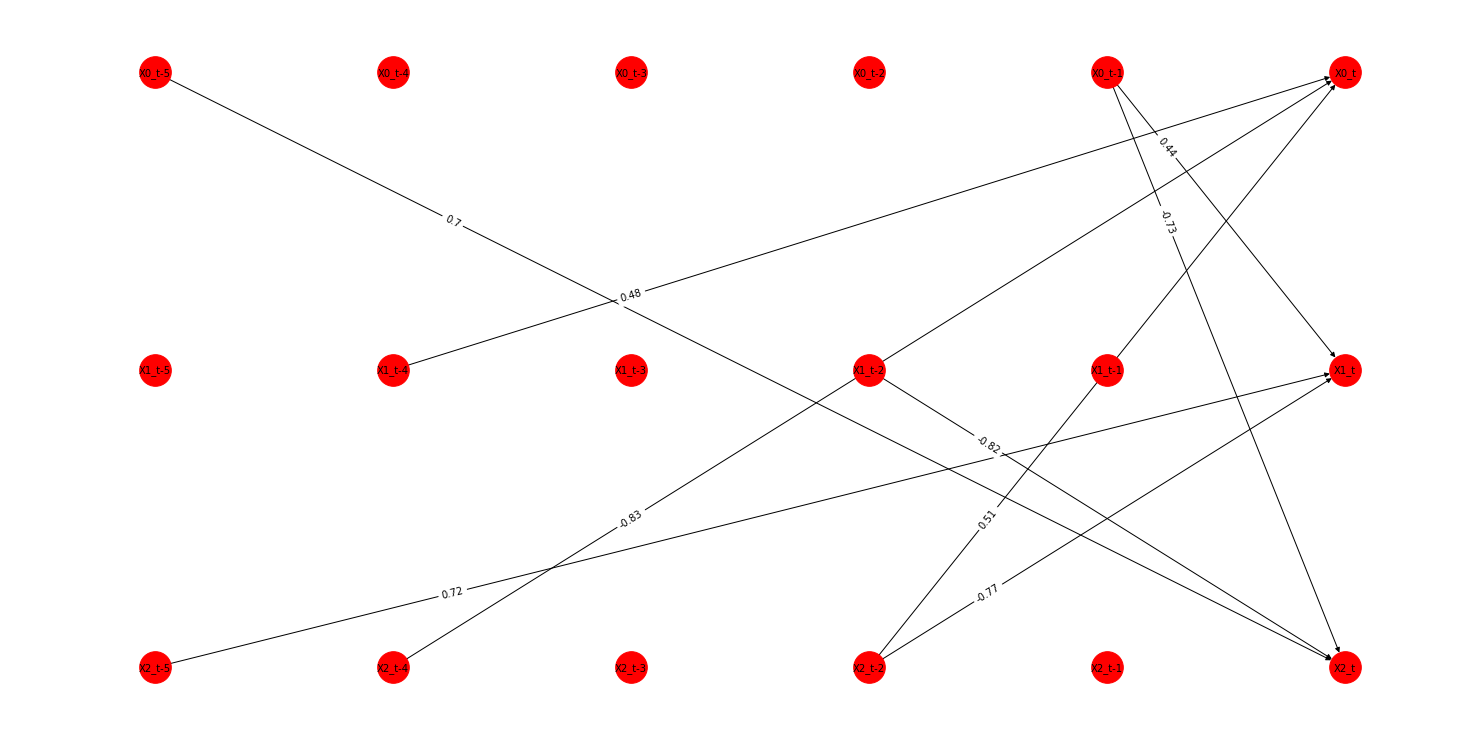

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
generator.draw_graph()

In [34]:
df_dict = {'dimension': dim, 'max time lag': tau, 'incoming edges': in_edges, 'run': run, 'autocorr': autocorr}
name = 'PC1 non-incremental'

_, graphs, _, _, _ = pc_incremental_pc1(partial_corr_test, generator.ts, max_p=tau+k, 
                                   use_stopper=False, alpha=0.01, verbose=True)
for offset in range(-k, k+1):
    f1_score = evaluate_edges(generator.graph, graphs[tau+offset])['f1-score']
    df_dict[name + '_f1' + (f'+{offset}' if offset>=0 else str(offset))] = f1_score
df_dict

{'dimension': 5,
 'max time lag': 20,
 'incoming edges': 2,
 'run': 0,
 'autocorr': False,
 'PC1 non-incremental_f1-2': 0.3478260869565218,
 'PC1 non-incremental_f1-1': 0.3478260869565218,
 'PC1 non-incremental_f1+0': 0.5806451612903225,
 'PC1 non-incremental_f1+1': 0.5625000000000001,
 'PC1 non-incremental_f1+2': 0.5454545454545454}

In [99]:
node_name(*node_id(list(graph.nodes())[0]))

'X0_t'

### Test Tigramite directly

In [87]:
setups[0]

(3, 2, 5, False, 10000, 0)

In [ ]:

dim, in_edges, tau, autocorr, _, run = setups[45]

generator = pickle.load(open(data_path + f't={tau}_d={dim}_in={in_edges}_autocorr={autocorr}_{run}.pickle', 'rb'))

In [ ]:
from tigramite.pcmci import PCMCI

